Author : Yash Trivedi


Task   : EDA-Sports

#  EDA on IPL-dataset

**Questions posed**

As a sports analyst, find out the most successful teams, players and factors
contributing win or loss of a team.
Suggest teams or players a company should endorse for its products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv("../input/ipl-dataset/matches.csv")
deliveries = pd.read_csv("../input/ipl-dataset/deliveries.csv")

In [3]:
print(matches.shape)
print(deliveries.shape)

(756, 18)
(179078, 21)


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
print(pd.isnull(matches).sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [6]:

matches.drop("umpire3", axis = 1, inplace = True)
matches.drop("umpire1", axis = 1, inplace = True)
matches.drop("umpire2", axis = 1, inplace = True)
matches.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
551,552,2015,Chandigarh,2015-05-03,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,LMP Simmons,"Punjab Cricket Association Stadium, Mohali"
377,378,2012,Pune,2012-05-22,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium
212,213,2010,Kolkata,2010-04-07,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,14,0,SC Ganguly,Eden Gardens
315,316,2012,Visakhapatnam,2012-04-09,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium
479,480,2014,Delhi,2014-05-03,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,KK Nair,Feroz Shah Kotla
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium
727,11323,2019,Mohali,16/04/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,12,0,R Ashwin,IS Bindra Stadium
309,310,2012,Mumbai,2012-04-06,Pune Warriors,Mumbai Indians,Mumbai Indians,field,normal,0,Pune Warriors,28,0,SPD Smith,Wankhede Stadium
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium


In [7]:
print(matches["city"].unique())
print(matches["winner"].unique())


['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Rising Pune Supergiants' 'Delhi Capitals']


In [8]:
matches["city"].fillna("Not Known", inplace=True)
matches["winner"].fillna("Not Known", inplace=True)

In [9]:
print(matches[matches["winner"] == "Not Known"]["result"])

300    no result
545    no result
570    no result
744    no result
Name: result, dtype: object


Thus, nan in "winner" does not mean that we don't have the data, but the match was washed out or not played due to some other reason and we don't have any clear winner of the match.

In [10]:
print(matches[matches["city"] == "Not Known"]["venue"])

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object


In [11]:
print(matches[matches["city"] == "Not Known"]["date"])

461    2014-04-19
462    2014-04-19
466    2014-04-23
468    2014-04-25
469    2014-04-25
474    2014-04-28
476    2014-04-30
Name: date, dtype: object


Due, to general elections in India, seven matches were hosted by UAE in 2014. Thus we can replace the unknown data in city column with Dubai.

In [12]:
matches["city"] = matches["city"].replace(["Not Known"],"Dubai")

In [13]:
print(matches["city"].unique())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Bengaluru']


In [14]:
matches["player_of_match"].fillna("Not Known", inplace=True)

In [15]:
print(matches[matches["player_of_match"] == "Not Known"]["result"])

300    no result
545    no result
570    no result
744    no result
Name: result, dtype: object


These are the same matches whose result was not known. Thus we can drop those 4 matches from dataset as our analysis is based upon MVP and dropping 4 entries will not affect accuracy.

In [16]:
matches.drop(matches.index[matches["player_of_match"]=="Not Known"], inplace = True)
matches.shape

(752, 15)

> # Seasonal Winners

In [17]:
sea_win = matches[["season","winner"]]
sea_win = sea_win.drop_duplicates(subset = ["season"], keep = "last")
sea_win.reset_index(drop = True).sort_values("season")

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [18]:
sea_win["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

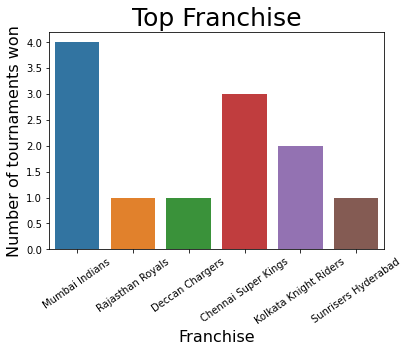

In [19]:
sns.countplot(data = sea_win, x = "winner")
plt.xlabel("Franchise", fontsize = 16)
plt.ylabel("Number of tournaments won", fontsize = 16)
plt.title("Top Franchise", fontsize = 25)
plt.xticks(rotation = 35, fontsize = 10)
plt.show()

# Mumbai Indians is the best franchise in the tournament

> # Number of matches won by teams

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


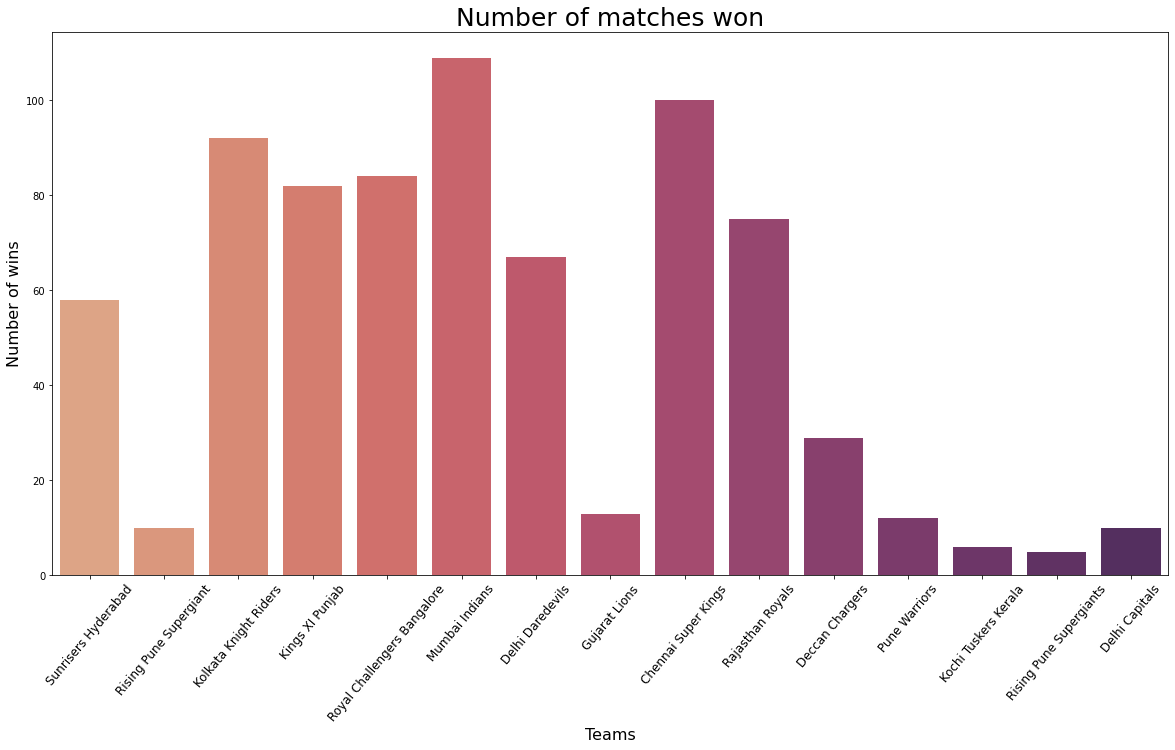

In [20]:
plt.figure(figsize=(20,10))
sns.countplot("winner",data = matches, palette = "flare" )
plt.title("Number of matches won", fontsize = 25)
plt.xlabel("Teams",fontsize = 16)
plt.ylabel("Number of wins", fontsize = 16)
plt.xticks(rotation = 50,  fontsize = 12)
plt.show()

> # Win type analysis

In [21]:
matches["win_by"] = np.where(matches["win_by_wickets"]>0,"bowl first","bat first")
wins = matches["win_by"].value_counts()
wins

bowl first    406
bat first     346
Name: win_by, dtype: int64

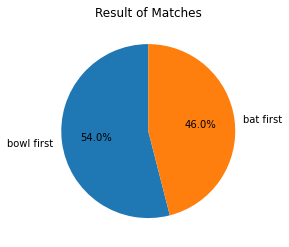

In [22]:
label = np.array(wins.index)
plt.pie(wins, labels = label,startangle = 90, autopct = "%1.1f%%")
plt.title("Result of Matches")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


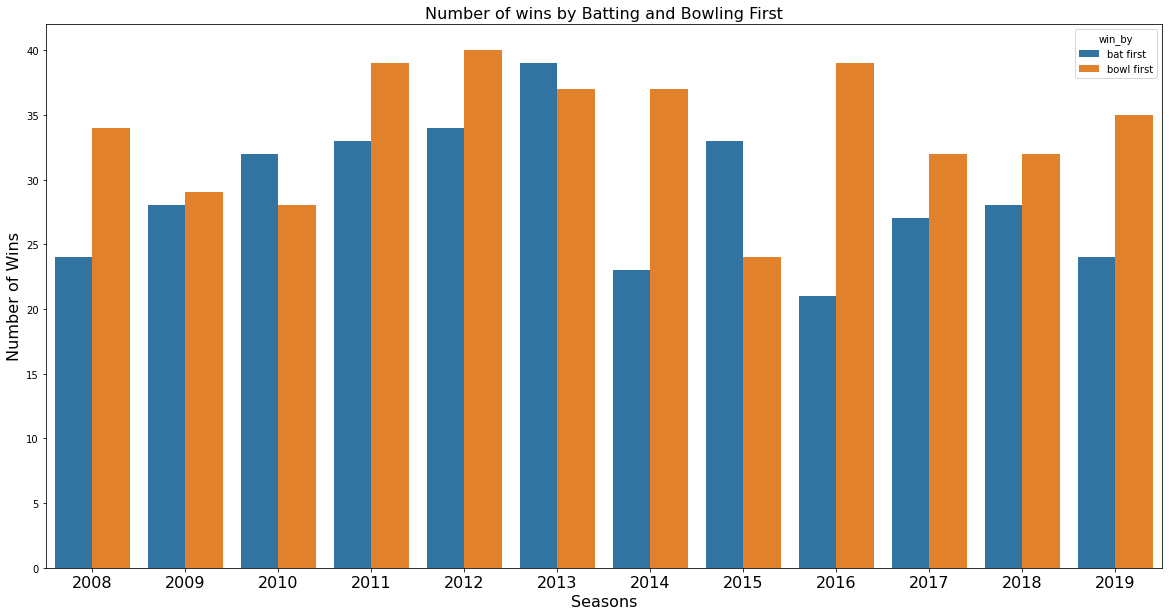

In [26]:
plt.figure(figsize=(20,10))
sns.countplot("season",data = matches, hue = "win_by" )
plt.title("Number of wins by Batting and Bowling First", fontsize =16)
plt.xlabel("Seasons",fontsize = 16)
plt.ylabel("Number of Wins", fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

# Bowling first has significant advantage over batting first in the tournament.

> # Toss Decision

In [23]:
toss = matches["toss_decision"].value_counts()
toss

field    460
bat      292
Name: toss_decision, dtype: int64

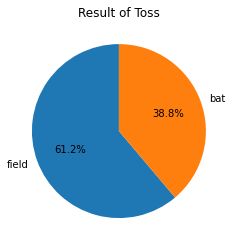

In [48]:
label = np.array(toss.index)
plt.pie(toss, labels = label,startangle = 90, autopct = "%1.1f%%")
plt.title("Result of Toss")
plt.show()

Now we will see this trend season by season.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


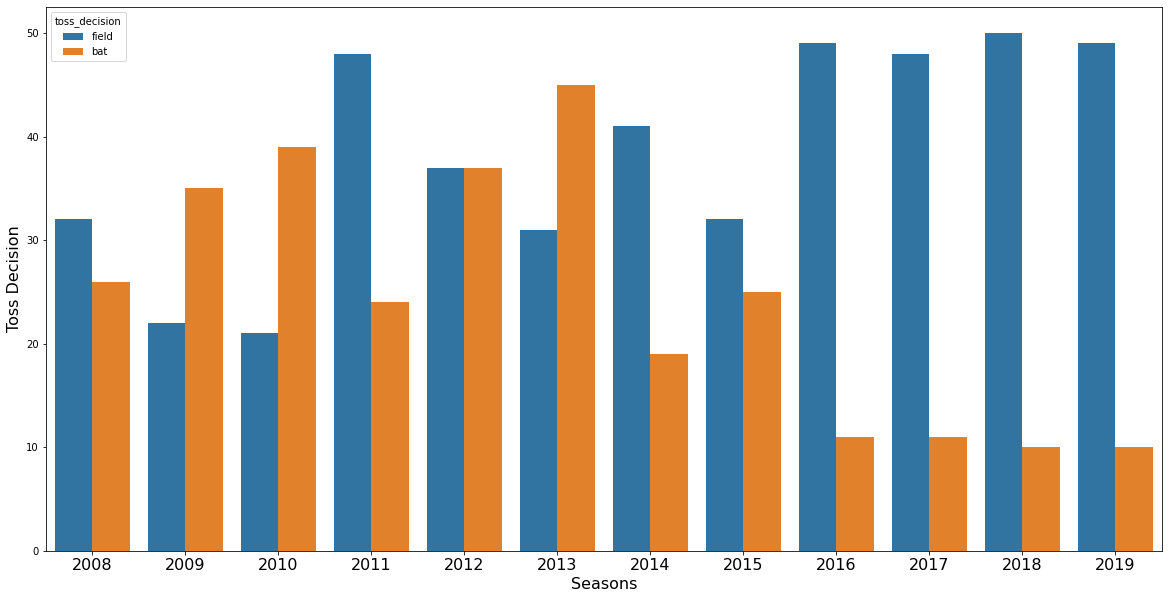

In [25]:
plt.figure(figsize=(20,10))
sns.countplot("season",data = matches, hue = "toss_decision" )
plt.xlabel("Seasons",fontsize = 16)
plt.ylabel("Toss Decision", fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

> # Impact of Toss

In [27]:
Toss_win = matches["toss_winner"] == matches["winner"]
Tw = Toss_win.value_counts()
Tw

True     393
False    359
dtype: int64

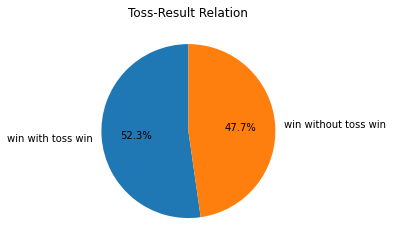

In [28]:
plt.pie(Tw, labels = ["win with toss win","win without toss win"] ,startangle = 90, autopct = "%1.1f%%")
plt.title("Toss-Result Relation")
plt.show()

# Toss plays significant role in outcome of result.

> # MVP

In [29]:
MVP = matches["player_of_match"].value_counts()
Top = MVP[:10]
Top

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

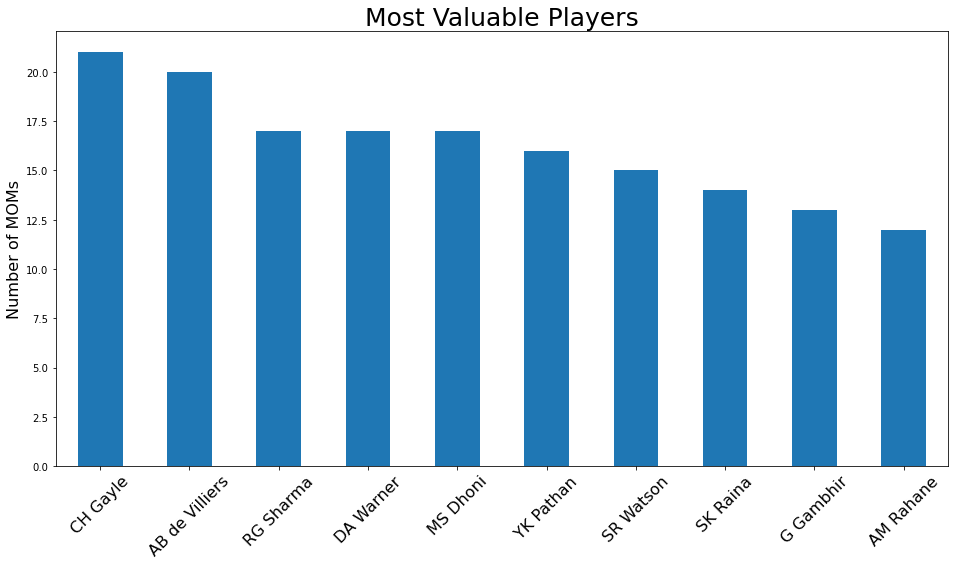

In [30]:
plt.figure(figsize = (16,8))
Top.plot.bar()
plt.ylabel("Number of MOMs", fontsize = 16)
plt.title("Most Valuable Players", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

# Chris Gayle and ABD are the most valuable players of the tournament.

> # Boundary Analysis

In [31]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [32]:
data = deliveries.merge(matches[["id","season","winner"]],how = "inner", left_on = "match_id",right_on = "id")
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [33]:
data = data.replace(["Rising Pune Supergiant"],"Rising Pune Supergiants")

In [34]:
boundary = data[["batting_team","batsman_runs","batsman"]]
bound4 = boundary[boundary["batsman_runs"] == 4]
Bound4 = bound4.groupby("batting_team")["batsman_runs"].agg([("Fours","count")])
bound6 = boundary[boundary["batsman_runs"] == 6]
Bound6 = bound6.groupby("batting_team")["batsman_runs"].agg([("Sixes","count")])
batsman6 = bound6.groupby("batsman")["batsman_runs"].agg([("Sixes","count")])
batsman4 = bound4.groupby("batsman")["batsman_runs"].agg([("Fours","count")])
Bound = Bound4.merge(Bound6, how = "inner",right_on = "batting_team",left_on="batting_team")
Bound

,Fours,Sixes
batting_team,,
Chennai Super Kings,2193,973
Deccan Chargers,957,400
Delhi Capitals,242,87
Delhi Daredevils,2141,790
Gujarat Lions,460,155
Kings XI Punjab,2458,976
Kochi Tuskers Kerala,170,53
Kolkata Knight Riders,2434,930
Mumbai Indians,2588,1096


In [35]:
Bound_total = Bound["Fours"]+Bound["Sixes"]
Bound_total

batting_team
Chennai Super Kings            3166
Deccan Chargers                1357
Delhi Capitals                  329
Delhi Daredevils               2931
Gujarat Lions                   615
Kings XI Punjab                3434
Kochi Tuskers Kerala            223
Kolkata Knight Riders          3364
Mumbai Indians                 3684
Pune Warriors                   721
Rajasthan Royals               2709
Rising Pune Supergiants         525
Royal Challengers Bangalore    3453
Sunrisers Hyderabad            1977
dtype: int64

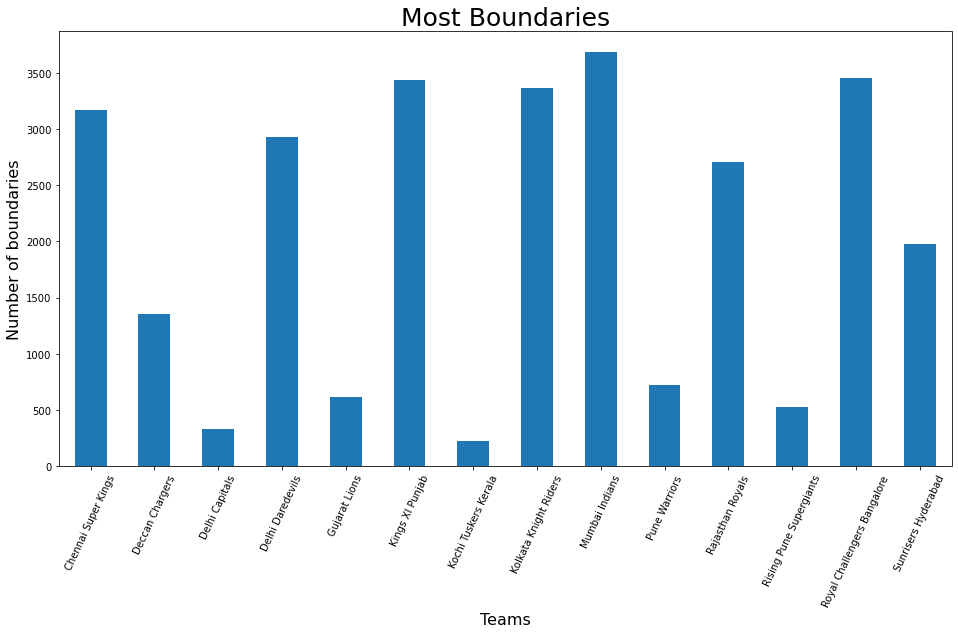

In [36]:
plt.figure(figsize = (16,8))
Bound_total.plot.bar()
plt.xlabel("Teams",fontsize = 16)
plt.ylabel("Number of boundaries", fontsize = 16)
plt.title("Most Boundaries", fontsize = 25)
plt.xticks(rotation = 65, fontsize = 10)
plt.show()

In [37]:
batsman4sort = batsman4.sort_values("Fours",ascending = False)
batsman4sort.head(10)

,Fours
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,481
DA Warner,458
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,375


<Figure size 1440x720 with 0 Axes>

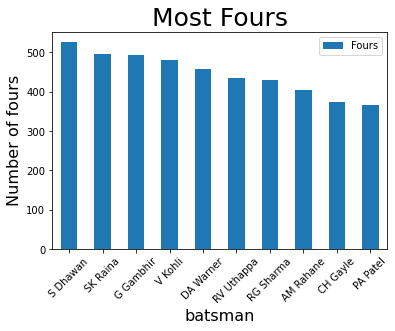

In [38]:
Top4 = batsman4sort[:10]
plt.figure(figsize = (20,10))
Top4.plot.bar()
plt.xlabel("batsman", fontsize = 16)
plt.ylabel("Number of fours", fontsize = 16)
plt.title("Most Fours", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

In [39]:
batsman6sort = batsman6.sort_values("Sixes",ascending = False)
batsman6sort.head(10)

,Sixes
batsman,
CH Gayle,326
AB de Villiers,213
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,188
DA Warner,179
SR Watson,177
KA Pollard,175


<Figure size 1440x720 with 0 Axes>

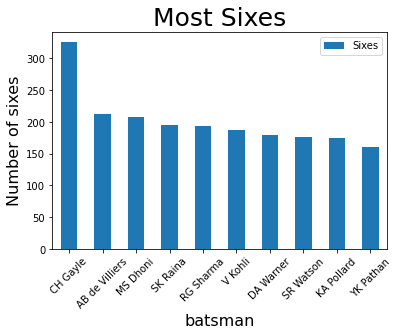

In [40]:
Top6 = batsman6sort[:10]
plt.figure(figsize = (20,10))
Top6.plot.bar()
plt.xlabel("batsman", fontsize = 16)
plt.ylabel("Number of sixes", fontsize = 16)
plt.title("Most Sixes", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

Chris Gayle is clearly the "Universe BOSS".

In [41]:
batsman_score = boundary.groupby("batsman")["batsman_runs"].agg([("Runs","sum")])
batsman_score_sort = batsman_score.sort_values("Runs",ascending = False)
batsman_score_sort.head(10)

,Runs
batsman,
SK Raina,5415
V Kohli,5407
RG Sharma,4914
DA Warner,4722
S Dhawan,4632
CH Gayle,4549
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4361


<Figure size 1440x720 with 0 Axes>

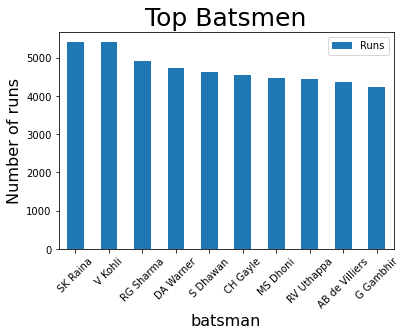

In [42]:
Top_scorer = batsman_score_sort[:10]
plt.figure(figsize = (20,10))
Top_scorer.plot.bar()
plt.xlabel("batsman", fontsize = 16)
plt.ylabel("Number of runs", fontsize = 16)
plt.title("Top Batsmen", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

# Suresh Raina and Virat Kohli are the leading run scorers in the tournament.

# Top Bowlers

In [43]:
print(pd.isnull(deliveries).sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


So many null values in player_dismissed and dismissal_kind doesn't mean that data is not available, but batsmen didn't got out on those deliveries.

In [44]:
print(deliveries["dismissal_kind"].unique())

[nan 'caught' 'bowled' 'run out' 'lbw' 'caught and bowled' 'stumped'
 'retired hurt' 'hit wicket' 'obstructing the field']


Retired Hurt, Obs field and runout doesn't count as bowler's wicket. Thus we will omit these values to calculate total wickets of bowlers.

In [45]:
wickets = deliveries.dropna(subset=['dismissal_kind'])
wickets = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
bowlers = wickets.groupby("bowler")['dismissal_kind'].agg(['count']).reset_index()
bowlers=bowlers.rename(columns={'count':'wickets'})
bowlers

,bowler,wickets
0,A Ashish Reddy,18
1,A Chandila,11
2,A Choudhary,5
3,A Flintoff,2
4,A Joseph,6
...,...,...
343,YA Abdulla,15
344,YK Pathan,42
345,YS Chahal,100
346,Yuvraj Singh,36


In [46]:
bowlers_sort = bowlers.sort_values("wickets",ascending = False)
Top_bowlers = bowlers_sort[:10]
Top_bowlers

,bowler,wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


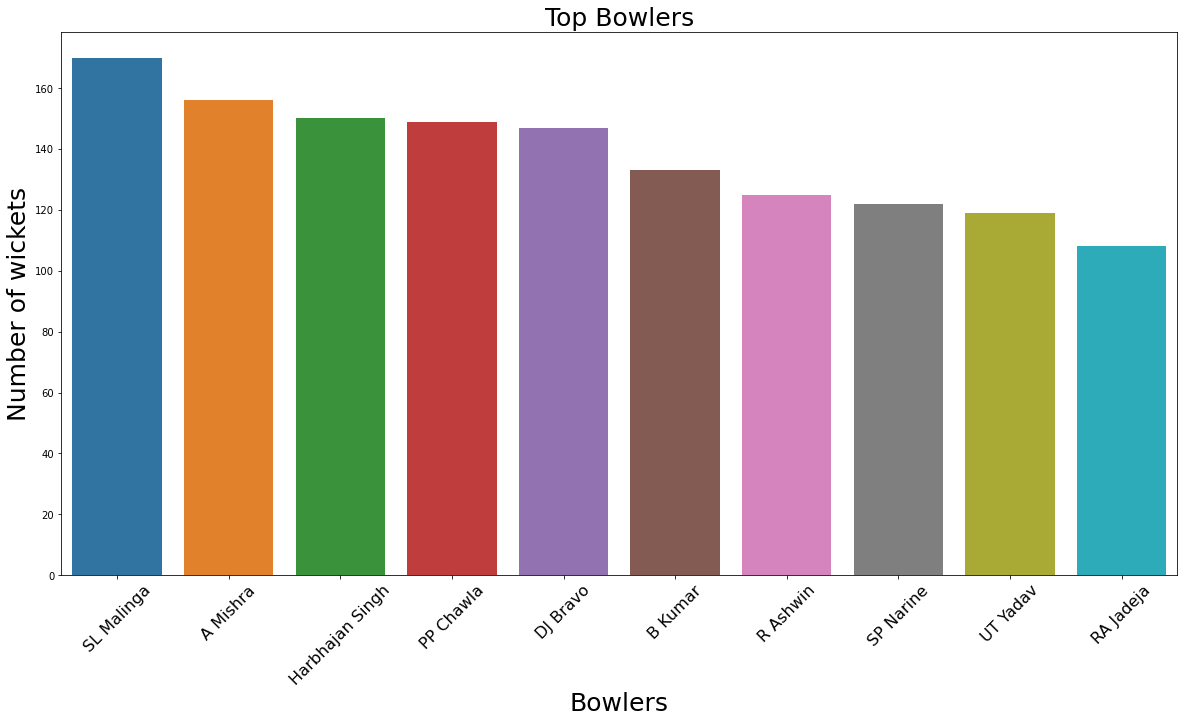

In [47]:
plt.figure(figsize = (20,10))
sns.barplot(data = Top_bowlers,x = "bowler",y = "wickets")
plt.xlabel("Bowlers", fontsize = 25)
plt.ylabel("Number of wickets", fontsize = 25)
plt.title("Top Bowlers", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

# Lasith Malinga tops the list of leading wicket takers.

> # Summary

Mumbai Indians, Chennai Super Kings and Kolkota Knight Riders are the three most successful teams in the tournament considering num ber of titles and number of games won.

Win the toss and bowl first has been the trend in recent times. (61.2% overall)

Team chasing the score has won 54% of matches.

If a team wins the toss then it has 52.3% chances of winning the game.

Chris Gayle and ABD are the MVPs of tournament having won Player of the Match 21 and 20 times respectively.

Shikhar Dhawan has struck most number of fours and Chris Gayle has hammered most sixes in the tournament.

Suresh Raina and Virat Kohli tops the list of leading run scorers in the tournament.

Lasith Malinga is the leading wicket taker.

Companies should go for any one of MI, CSK or KKR to endorse thier products. 

Companies should reach out to Chris Gayle, ABD, Virat Kohli, Suresh Raina, Lasith Malinga, Shikhar Dhawan, Rohit Sharma, David Warner and MS Dhoni for endorsement of their priducts.

